# Introductory applied machine learning (INFR10069)

<font color='red'>TOTAL: 87/100</font>
<br>
<font color='green'>COMMENT: -</font>

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 05_Assignment_2.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=05_Assignment_2.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 05_Assignment_2.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 --- [1 mark] ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
print('Number of samples: {}, number of attributes: {}'.format(auto_numeric.shape[0], auto_numeric.shape[1]))

Number of samples: 159, number of attributes: 16


### ========== Question 1.2 --- [1 mark] ==========
Display the first 8 instances of the dataset.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [3]:
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 --- [1 mark] ==========
Display the summary statistics for the dataset.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [4]:
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4 --- [2 marks] ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

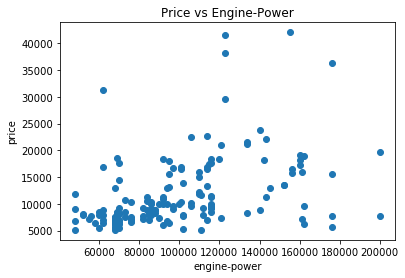

In [5]:
plt.title('Price vs Engine-Power')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.scatter(auto_numeric['engine-power'], auto_numeric['price'])
plt.show()

### ========== Question 1.5 --- [2 marks] ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: Yes.</font>

Engine power alone is not enough to predict the price. While there is a general trend of price increasing with engine power, the price varies quite a bit for a given value of engine-power. There are instances of the price ranging from 10000 to 40000 when engine power is around 125000. Also the price for most vehicles seems to range around 10000 and instances of that are noticed for most values of engine power.

### ========== Question 1.6 --- [2 marks] ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

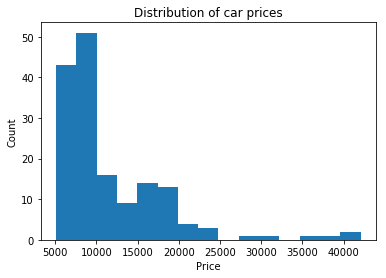

In [6]:
plt.title('Distribution of car prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.hist(auto_numeric['price'], label='Price', bins=15)
plt.show()

### ========== Question 1.7 --- [2 marks] ==========
How could you preprocess the data to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

<font color='red'>TASK MARK: 0</font>
<br>
<font color='green'>COMMENT:  Here, the outliers are not invalid datapoints- they're just expensive cars, and as such, removing them would be inappropriate. A log transform would be better. </font>

We could remove outliers to better fit the data. There are a few data points around the 120000 engine power range that have unusually high price. This could skew the linear fit, so removing it could better fit the data. Alternatively we could do something like taking the log of data to help rescale and reduce effect of outliers.

### ========== Question 1.8 --- [1 mark] ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [7]:
X=auto_numeric['engine-power']
y=auto_numeric['price']

### ========== Question 1.9 --- [1 mark] ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [8]:
X=X.values.reshape((159, 1))
X.shape

(159, 1)

### ========== Question 1.10 --- [1 mark] ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

### ========== Question 1.11 --- [2 marks] ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [10]:
dt=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
dt.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12 --- [2 marks] ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [11]:
a=auto_numeric['engine-power']
b = dt.predict(X)
coefficients = np.polyfit(a, b, 1)
print ('Price='+str(coefficients[0])+'*Engine Power + '+str(coefficients[1]))
# Therefore we can create an equation of the form: price= a*x + b #
# Where X = Engine power and a = 0.08988 and b = 2823 #

# Price = Engine-Power*0.08988 + 2823 #


Price=0.0898838874387*Engine Power + 2823.1218911


### ========== Question 1.13 --- [3 marks] ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Good. </font>

If we apply a basic slope line to our predicted prices model, it shows that if engine power is increased by 1 price goes up 0.08988. It isn't possible to tell whether or not engine-power is influential based on this. All this tells us is the average increase in price with engine-power, but it doesn't give any indication on whether the general trend is consistent over most of the data. Correlation Coefficient would be a more useful metric.

### ========== Question 1.14 --- [2 marks] ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

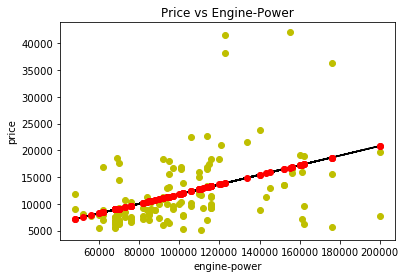

In [12]:
plt.title('Price vs Engine-Power')
plt.xlabel('engine-power')
plt.ylabel('price')
fit_fn = np.poly1d(coefficients) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(X_train,y_train, 'yo', X_train ,fit_fn(X_train), '--k')
plt.plot(X_train, dt.predict(X_train), 'ro')
plt.show()

### ========== Question 1.15 --- [2 marks] ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Precisely. </font>

Hold-out validation can have a high variance. It may depend heavily on which data points end up in the training set and which end up in the test set, therefore the validation may be very different depending on how the division is made.

### ========== Question 1.16 --- [1 mark] ==========
Now we want to use k-fold cross-validation to evaluate the performance of the regression model. Famliriase yourself with the sklearn method [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set the `shuffle` parameter to `True` and `random_state` to `0`. Use the object to print the training and validation indices for the `auto_numeric` dataset (hint: see the `split` method).

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [13]:
cross=KFold(n_splits=5, shuffle=True, random_state=0)
split=cross.split(auto_numeric['price'])
for i, j in split:
    print ('TRAIN:', i, 'TEST:', j)

TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] TEST: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  92  94  95  98  99

### ========== Question 1.17 --- [3 marks] ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances in each fold.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [14]:
split=cross.split(auto_numeric['price'])
for train, test in split:
    sum=0
    for index in train:
        sum=sum+auto_numeric['price'][index]
    print (sum/len(train))

11853.2677165
11635.976378
11689.8740157
11709.8267717
11535.84375


### ========== Question 1.18 --- [3 marks] ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  - </font>

In [15]:
new=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
y_pred=cross_val_predict(new, X, y, cv=cross.split(X))
print(y_pred.shape)
print(y.shape)

(159,)
(159,)


### ========== Question 1.19 --- [2 marks] ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [16]:
print('Coefficient of Determination:',r2_score(y, y_pred))
rms = np.sqrt(mean_squared_error(y, y_pred))
print('Root mean squared error:', rms)
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Correlation Coefficient:',np.corrcoef(y, y_pred)[1][0])

Coefficient of Determination: 0.173005270976
Root mean squared error: 6114.45211862
Mean Absolute Error: 3987.95779619
Correlation Coefficient: 0.417122199043


### ========== Question 1.20 --- [4 marks] ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Good. </font>

The correlation value of 0.41 indicates a moderate positive correlation. Basically we notice a moderate general trend of price increasing when engine power is increased. The mean absolute error for the predictions is 3987 which means on the average our predictor is 3987 away from predicting the correct value. Thats a fairly high value considering the average price is around 11500-12000. This shows it is difficult to predict the price with engine power alone. The RMSE is very high and it tends to give large weightage to bigger errors. This indicates there are some instances/outliers in our data that are unusually large compared to the predicted values and this contributes to the large RMSE value.

### ========== Question 1.21 --- [3 marks] ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:   What can you say about the distribution here?</font>

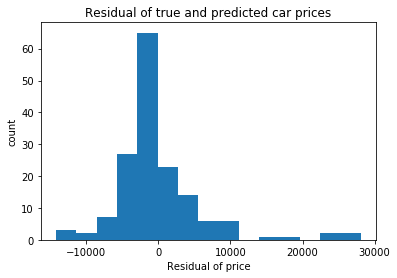

In [17]:
plt.title('Residual of true and predicted car prices')
plt.xlabel('Residual of price')
plt.ylabel('count')
plt.hist(y-y_pred, label='Price', bins=15)
plt.show()

There are more negative residuals than positive ones. This means our predicted values were larger than our true values in most cases. This is expected since the few large outliers with high price skewed the prediction system to predict larger values, resulting in it overcompensating with larger predicted price values.

### ========== Question 1.22 --- [2 marks] ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [18]:
data_pathnew = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_pathnew, delimiter = ',')
X_base=auto_base['engine-power']
X_base=X_base.values.reshape((159, 1))
y_base=auto_base['price']
base=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
y_base_pred=cross_val_predict(base, X_base, y_base, cv=cross.split(X_base))
print('Coefficient of Determination:',r2_score(y_base, y_base_pred))
rms_base = np.sqrt(mean_squared_error(y_base, y_base_pred))
print('Root mean squared error:', rms_base)
print('Mean Absolute Error:', mean_absolute_error(y_base, y_base_pred))
print('Correlation Coefficient:',np.corrcoef(y_base, y_base_pred)[1][0])

Coefficient of Determination: -0.00213595381121
Root mean squared error: 6730.84360395
Mean Absolute Error: 4901.86096203
Correlation Coefficient: -0.0619144160589


### ========== Question 1.23 --- [2 marks] ==========
Show a scatter plot of predicted vs. true prices and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

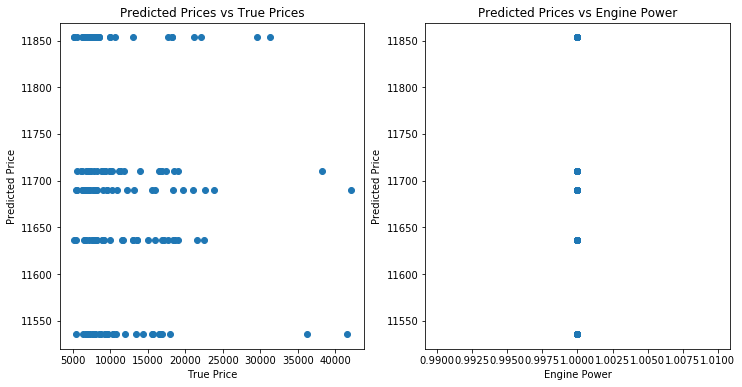

In [19]:
f, axarr = plt.subplots(1,2, figsize=(12,6))
axarr[0].set_xlabel('True Price')
axarr[0].set_ylabel('Predicted Price')
axarr[0].scatter(y_base, y_base_pred)
axarr[0].set_title('Predicted Prices vs True Prices')
axarr[1].set_xlabel('Engine Power')
axarr[1].set_ylabel('Predicted Price')
axarr[1].scatter(X_base, y_base_pred)
axarr[1].set_title('Predicted Prices vs Engine Power')
plt.show()

### ========== Question 1.24 --- [3 marks] ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Yes. </font>

The simplest baseline model when it comes to regression is to take the mean. If we calculate the mean price for all instances of engine-power we can just give that value as the predicted value. This would result in just a straight line parallel to the x-axis. This is seen in the graph above produced by our previous model. Since engine-power is set to 1 for all instances, the predicted output for each fold is essentially just the mean of the training instances. This is a very poor model and it is no surprise the model performs poorly considering the data used to train it. The model will literally predict the same value for all inputs, making it essentially useless.

### ========== Question 1.25 --- [2 marks] ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics about the `auto_base` dataset.*)

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [20]:
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


It performs so poorly because engine power is 1 for every instance in the dataset. Basically the data has no changing values of engine power to try and understand how price changes with engine power. As such it predicts the average of prices for all inputs.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 --- [10 marks] ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

<font color='red'>TASK MARK: 7</font>
<br>
<font color='green'>COMMENT:  You need to mention a correlated pair, and observe that one of this pair can also safely be removed. </font>

Correlation Coefficient of price and normalized-losses 0.0153676474237
Correlation Coefficient of price and wheel-base 0.42351059515
Correlation Coefficient of price and length 0.512883045265
Correlation Coefficient of price and width 0.524325552127
Correlation Coefficient of price and height 0.139562558987
Correlation Coefficient of price and engine-size 0.715124590191
Correlation Coefficient of price and bore 0.365207289213
Correlation Coefficient of price and stroke 0.127834031933
Correlation Coefficient of price and compression-ratio 0.125683221675
Correlation Coefficient of price and engine-power 0.443968591463
Correlation Coefficient of price and peak-rpm -0.0993452910632
Correlation Coefficient of price and city-mpg -0.356789500672
Correlation Coefficient of price and highway-mpg -0.438467431714
Correlation Coefficient of price and mean-effective-pressure -0.10486005065
Correlation Coefficient of price and torque 0.101434581307
Correlation Coefficient of price and price 1.0


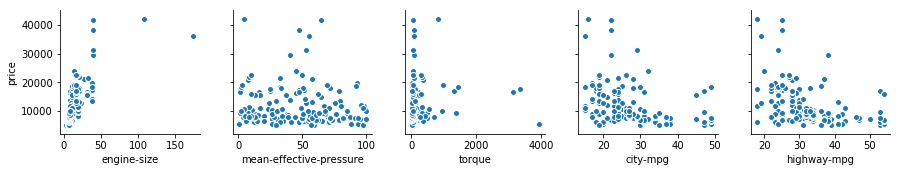

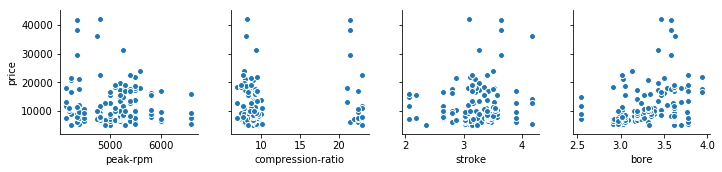

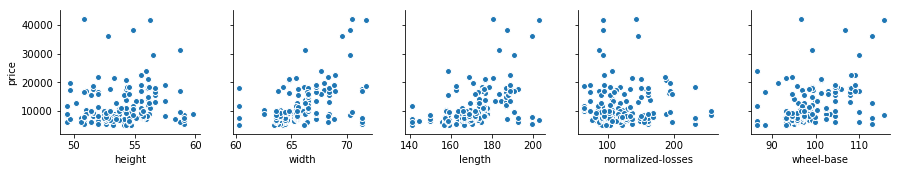

In [21]:
sns.pairplot(data=auto_numeric, x_vars=['engine-size', 'mean-effective-pressure', 'torque','city-mpg','highway-mpg'], y_vars=['price'], kind='scatter')
sns.pairplot(data=auto_numeric, x_vars=['peak-rpm', 'compression-ratio', 'stroke','bore'], y_vars=['price'], kind='scatter')
sns.pairplot(data=auto_numeric, x_vars=['height','width', 'length', 'normalized-losses','wheel-base'], y_vars=['price'], kind='scatter')
for i in auto_numeric.columns:
    print('Correlation Coefficient of price and', i,np.corrcoef(auto_numeric['price'], auto_numeric[i])[1][0])

The attributes that shows strong positive correlation is engine size(0.71) and width shows moderate positive correlation(0.52). If I had to choose two attributes to predict price it would be engine size and width. On the other hand normalized-losses and peak-rpm show very weak correlation and would be safe bets to remove from the dataset as they do not contribute in predicting the price(seem to be independent).

### ========== Question 2.2 --- [3 marks] ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  - </font>

In [22]:
mlr=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
multiX=auto_numeric.as_matrix(columns=[auto_numeric.columns[0:15]])
newsplit=KFold(n_splits=5, shuffle=True, random_state=0)
newy_pred=cross_val_predict(mlr, multiX, y, cv=newsplit.split(multiX))


### ========== Question 2.3 --- [2 marks] ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [23]:
print('Coefficient of Determination:',r2_score(y, newy_pred))
multirms = np.sqrt(mean_squared_error(y, newy_pred))
print('Root mean squared error:', multirms)
print('Mean Absolute Error:', mean_absolute_error(y, newy_pred))
print('Correlation Coefficient:',np.corrcoef(y, newy_pred)[1][0])

Coefficient of Determination: 0.486137984457
Root mean squared error: 4819.80464283
Mean Absolute Error: 3050.34459963
Correlation Coefficient: 0.742560270537


### ========== Question 2.4 --- [2 marks] ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

The Root Mean Squared Error has decreased indicating prediction of outliers has improved as they contribute the most to this statistic. Mean absolute error has also decreased as would be expected based on the root mean squared error decreasing. The model is predicting closer to the actual values than it did before. The correlation coefficient is storng and positive, the predicted values in general show a good trend with the original values.

### ========== Question 2.5 --- [2 marks] ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

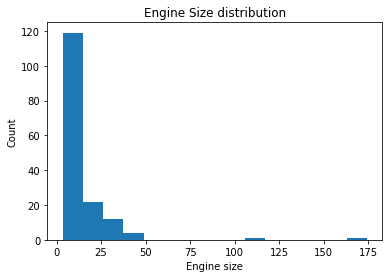

In [24]:
# Your code goes here
plt.title('Engine Size distribution')
plt.xlabel('Engine size')
plt.ylabel('Count')
plt.hist(auto_numeric['engine-size'], label='Engine Size', bins=15)
plt.show()

### ========== Question 2.6 --- [2 marks] ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  The problem here is not necessarily the outliers (in LR only some outliers are problematic - those with high leverage, which you won't be able to tell from this plot), but more the overall skewed distribution (mean >> median). </font>

The distribution seems to indicate there are a few clear outilers, but most of the data is well balanced. We can rescale the data using log. Using this data with the outliers would still cause issues, but these two data points could be easily removed or its effects can be dampened by taking the log of engine size. Once that is done the data should be easy to use in predictions.

### ========== Question 2.7 --- [3 marks] ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Good. </font>

In [25]:
for i in range(0, len(auto_numeric['engine-size'])):
    auto_numeric['engine-size'][i]=np.log(auto_numeric['engine-size'][i])

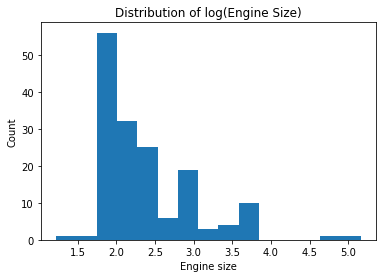

In [26]:
plt.title('Distribution of log(Engine Size)')
plt.xlabel('Engine size')
plt.ylabel('Count')
plt.hist(auto_numeric['engine-size'], label='Engine Size', bins=15)
plt.show()

### ========== Question 2.8 --- [3 marks] ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [27]:
transmlr=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
transX=auto_numeric.as_matrix(columns=[auto_numeric.columns[0:15]])
transy_pred=cross_val_predict(transmlr, transX, y, cv=newsplit.split(transX))
transrms = np.sqrt(mean_squared_error(y, transy_pred))
print('Coefficient of Determination:',r2_score(y, transy_pred))
print('Root mean squared error:', transrms)
print('Mean Absolute Error:', mean_absolute_error(y, transy_pred))
print('Correlation Coefficient:',np.corrcoef(y, transy_pred)[1][0])

Coefficient of Determination: 0.689612268029
Root mean squared error: 3745.91959756
Mean Absolute Error: 2668.36429567
Correlation Coefficient: 0.831675321658


### ========== Question 2.9 --- [3 marks] ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:   I would have liked a little more mathematical detail on how the log transform helped.</font>

The new model showed significant improvements on all stats. Coefficient of Determination has improved significantly meaning the model fits the data better now. Root mean squared error has decreased, so outliers have been brought closer to the rest of the data points. Mean absolute error is down, so we predicted values are even closer to the true values. A very strong positive correaltion of +0.83 is seen indicating in general are predicted data points have a very similar trend to the original values. Taking the logarithm values has reduced the effect the outliers had.

### ========== Question 2.10 --- [2 marks] ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [28]:
pd.set_option('max_columns', 30)

In [29]:
newdata_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(newdata_path, delimiter = ',')
print('Number of samples: {}, number of attributes: {}'.format(auto_full.shape[0], auto_full.shape[1]))
auto_full.head(20)

Number of samples: 159, number of attributes: 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 --- [3 marks] ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Good. </font>

The categorical variables in the dataset are:
1. make
2. fuel-type
3. aspiration
4. num-of-doors
5. body-style
6. drive-wheels
7. engine-location
8. engine-type
9. num-of-cylinders
10. fuel-system
11. symboling

Nominal attributes can not be used in their current form because linear regression works only on numeric values. Since linear regression uses a basic mathematical equation form it requires a numeric value to represent a data point. Categorical attributes need to be assigned numbers or can be used in the binary form to make it work. 

### ========== Question 2.12 --- [5 marks] ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


<font color='red'>TASK MARK: 5</font>
<br>
<font color='green'>COMMENT:  Good </font>

In [30]:
auto_full_edit = auto_full.copy(deep=True)
cat=['make','fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type','num-of-cylinders', 'fuel-system','symboling']
for var in cat:
    le=LabelEncoder()
    le.fit(auto_full_edit[var])
    auto_full_edit[var]=le.transform(auto_full_edit[var])
enc=OneHotEncoder(categorical_features=[1,2,3,4,5,6,7,12,13,15,23],
       handle_unknown='error', n_values='auto', sparse=True)
X_enc=enc.fit_transform(auto_full_edit.drop('price', axis=1))

In [31]:
X_enc.shape

(159, 70)

### ========== Question 2.13 --- [2 marks] ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [32]:
enclr=LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
enccross=KFold(n_splits=5, shuffle=True, random_state=0)
ency_pred=cross_val_predict(enclr, X_enc, y, cv=enccross.split(X_enc))
encrms = np.sqrt(mean_squared_error(y, ency_pred))
print('Coefficient of Determination:',r2_score(y, ency_pred))
print('Root mean squared error:', encrms)
print('Mean Absolute Error:', mean_absolute_error(y, ency_pred))
print('Correlation Coefficient:',np.corrcoef(y, ency_pred)[1][0])

Coefficient of Determination: 0.86383451765
Root mean squared error: 2481.07385412
Mean Absolute Error: 1706.44341397
Correlation Coefficient: 0.931517349598


### ========== Question 2.14 --- [4 marks] ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Good. </font>

The complex model performs far better than the earlier models. Cross validation also helps with reducing the risk of overfitting. The coefficient of determination and correlation are very high. The root mean squared error and mean absolute error are also quite low meaning the predictions are very close to the real value. The advantage of this is very high accuracy on the training data, the model captures the intricate details of our training data. The disadvantage is that the data might be overfitted. The model is too sensitive to the quirks of the training data. As such it may perform poorly on new testing data. The model forms very strong biases to the training instances. The good performance on the training data could basically be misleading.

### ========== Question 2.15 --- [4 marks] ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT:  Good. </font>

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50).fit(X_enc, y)
rfy_pred=cross_val_predict(rf, X_enc, y, cv=cross.split(X_enc))
print('Random Tree Regressor Performance:')
print('Coefficient of Determination:',r2_score(y, rfy_pred))
rfrms = np.sqrt(mean_squared_error(y, rfy_pred))
print('Root mean squared error:', rfrms)
print('Mean Absolute Error:', mean_absolute_error(y, rfy_pred))
print('Correlation Coefficient:',np.corrcoef(y, rfy_pred)[1][0])
print('\n')
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_enc, y)
dt_pred=cross_val_predict(dt, X_enc, y, cv=cross.split(X_enc))
print('Decision Tree Regressor:')
print('Coefficient of Determination:',r2_score(y, dt_pred))
dtrms = np.sqrt(mean_squared_error(y, dt_pred))
print('Root mean squared error:', dtrms)
print('Mean Absolute Error:', mean_absolute_error(y, dt_pred))
print('Correlation Coefficient:',np.corrcoef(y, dt_pred)[1][0])


Random Tree Regressor Performance:
Coefficient of Determination: 0.829924633933
Root mean squared error: 2772.85324508
Mean Absolute Error: 1809.71786164
Correlation Coefficient: 0.911137976596


Decision Tree Regressor:
Coefficient of Determination: 0.774537755329
Root mean squared error: 3192.58957312
Mean Absolute Error: 2207.94339623
Correlation Coefficient: 0.885864707791


The random forest regressor performs pretty much as well as our complex model, decision tree regressor shows a dip in performance. A decision tree is built using the whole dataset considering all features, but in random forests a fraction of the number of rows is selected at random and a particular number of features are selected at random to train on and a decision tree is built on this subset. This helps to reduce the risk of overfitting. So it's not surprising that random forest performs better than decision tree which risks overfitting.